<a href="https://colab.research.google.com/github/Saulrega/fundamentos_ML/blob/main/Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                          keras.layers.Dense(128, activation=tf.nn.relu), 
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                          ])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7063 - accuracy: 0.7045
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6249 - accuracy: 0.7792
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5606 - accuracy: 0.7976
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5323 - accuracy: 0.8071
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5142 - accuracy: 0.8149


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5927 - accuracy: 0.7955


In [ ]:
TFPredict = model.predict(test_images)

In [ ]:
text_labels = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

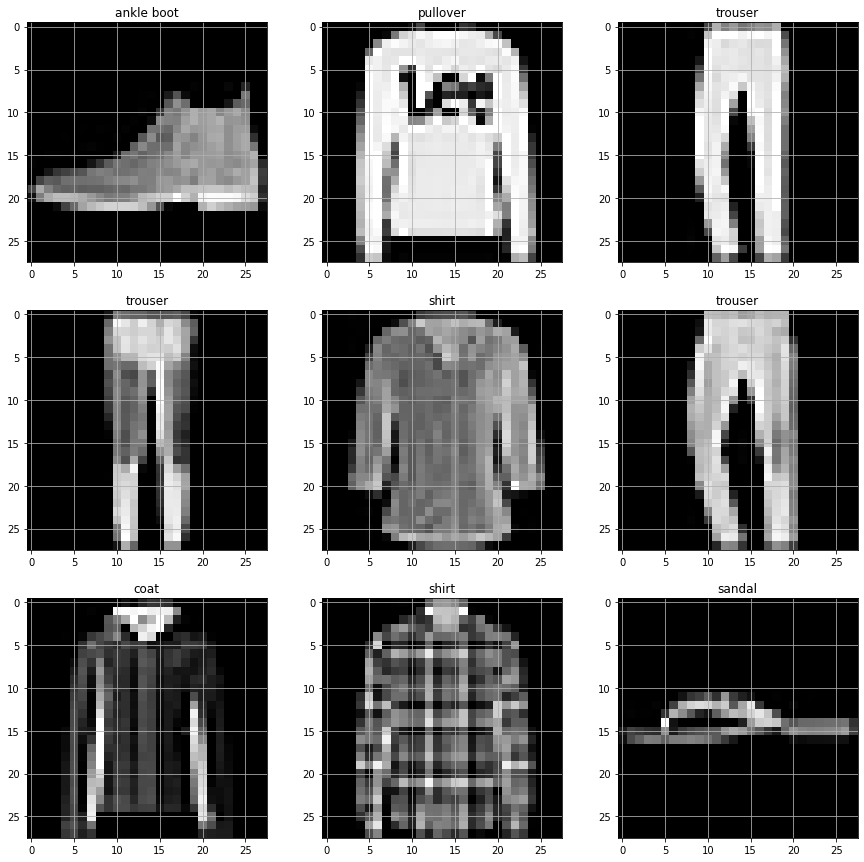

In [ ]:
def img_subplot (tf_predict, test_images, text_labels, nrows, ncols):

  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
  tam = np.min([len(text_labels), nrows*ncols])
  
  i=0
  while (i<tam):
    for k in range(nrows):
      for j in range(ncols):
        ax[k,j].imshow(test_images[i], cmap='gray')
        p_label = np.where(tf_predict[i]==np.max(tf_predict[i]))[0][0]
        ax[k,j].set_title(text_labels[p_label])
        ax[k,j].grid()
        
        i=i+1

  plt.show()   

img_subplot(TFPredict, test_images,text_labels, 3,3)